In [2]:
sql = """select 
  date, 
  institute, 
  category, 
  sum(value) as value 
from mortgages 
where strftime('%Y', date) > "2008" 
group by date, institute, category 
order by date, institute, category"""

In [3]:
from urllib.parse import urlencode
import pandas

/Users/jokull/Library/Caches/pypoetry/virtualenvs/sedlabanki-data-sYRS-vq_-py3.9/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
url = "https://sedlabanki-housing-mtckiezzpq-lz.a.run.app/housing.csv?" + urlencode({"sql": sql})

In [5]:
series = pandas.read_csv(url, parse_dates=['date'])

<Figure size 1800x1200 with 0 Axes>

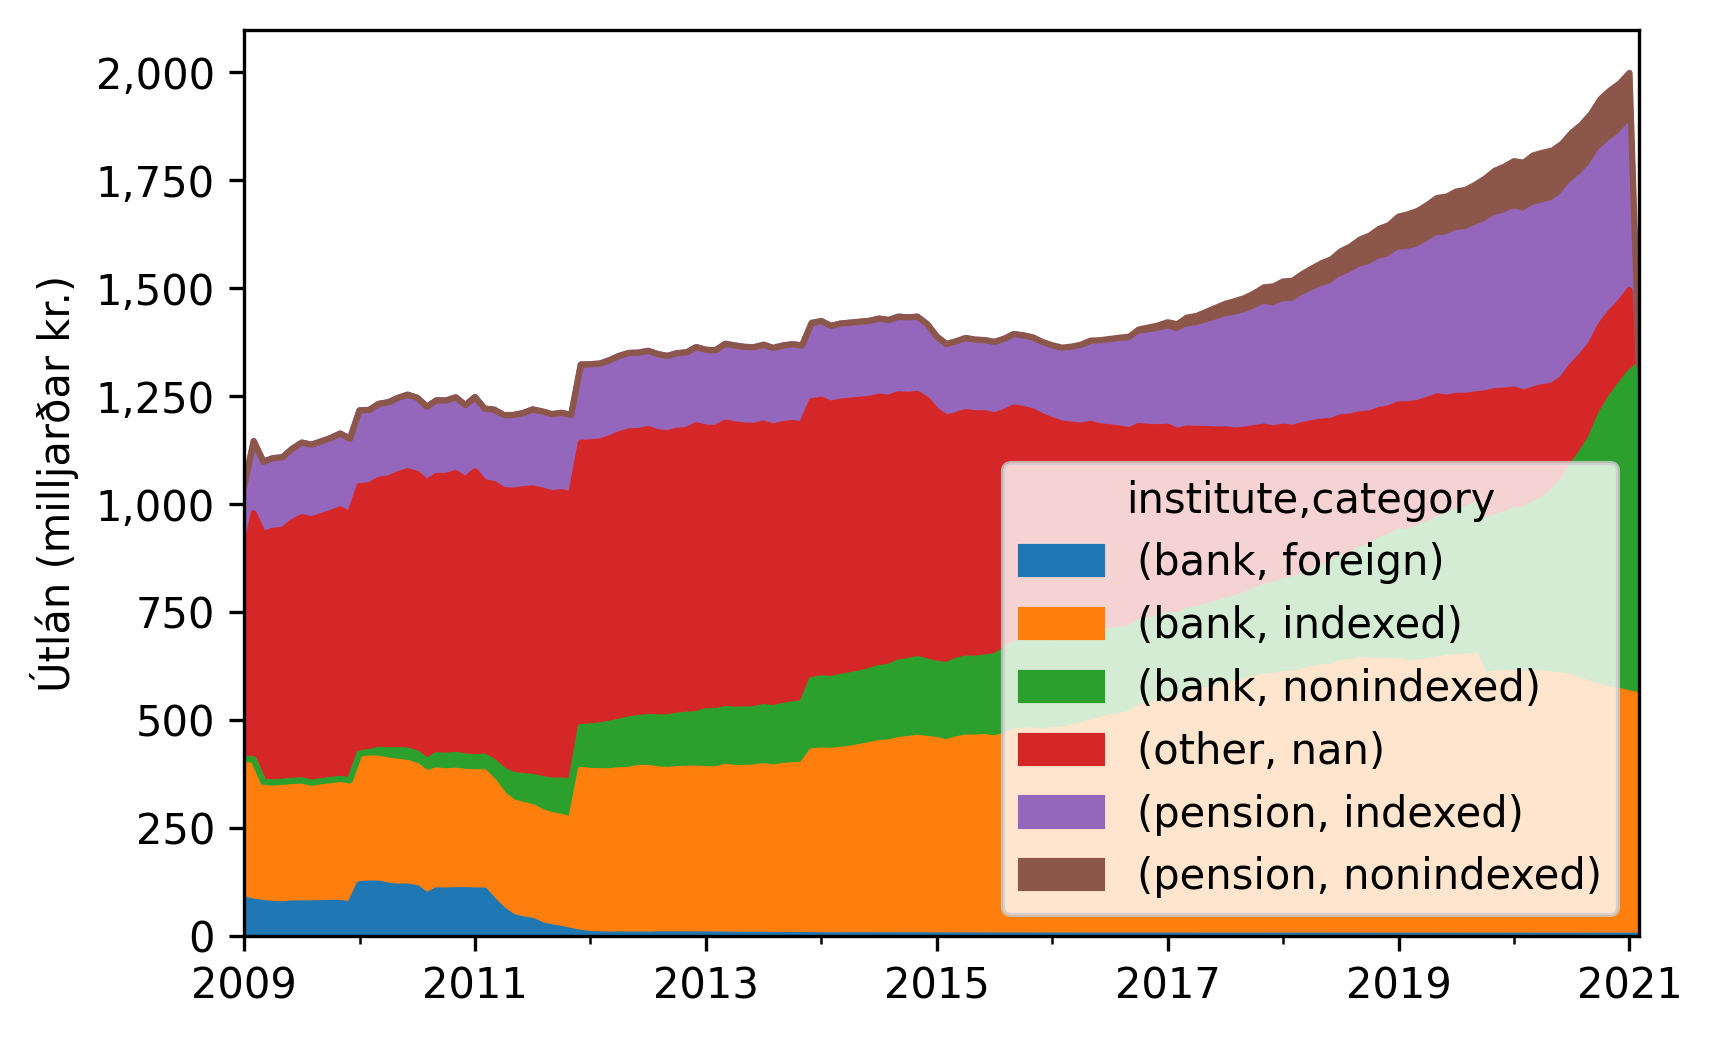

In [6]:
from matplotlib.ticker import FuncFormatter

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 300

df = series.pivot(index="date", columns=("institute","category"), values="value")
fig = plt.figure()
ax = df.plot.area(stacked=True)
ax.set_ylabel("Útlán (milljarðar kr.)")
ax.set_xlabel(None)

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y / 1_000_000_000:,.0f}')) 

